In [10]:
import numpy as np 
import pandas as pd 
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)

In [12]:
df = pd.read_csv('youtube_shorts_performance_dataset.csv')
print(df.head())
numberOf_duplicated_rows = df.duplicated().sum()
print("Number of duplicated rows: ", numberOf_duplicated_rows)

   video_id           title  duration_sec  hashtags_count   views  likes  comments  shares  upload_hour   category
0  vid_1000  Short Video #0            43               9  198775  21933      3228     400            8       Tech
1  vid_1001  Short Video #1            56               2  290336  20063      3719    1942           16     Comedy
2  vid_1002  Short Video #2            33               6  264206  37032      3228    1817            7       Food
3  vid_1003  Short Video #3            19               9   85076  27269      2371     980            1  Lifestyle
4  vid_1004  Short Video #4            47               8   90780   8041      2891    1109           23       Tech
Number of duplicated rows:  0


In [13]:
rows_with_missing = df[df.isna().any(axis=1)]
print("Rows with missing values:")
print(rows_with_missing)

Rows with missing values:
Empty DataFrame
Columns: [video_id, title, duration_sec, hashtags_count, views, likes, comments, shares, upload_hour, category]
Index: []


In [35]:
df['engagement_rate'] = (df['likes'] + df['comments'] + df['shares']) / df['views']
df['engagement_rate_tertile'] = pd.qcut(df['engagement_rate'], [0, 0.33, 0.66, 1], labels=['Low', 'Medium', 'High']) 
df['title_len_chars'] = df['title'].apply(len)
df['title_word_count'] = df['title'].apply(lambda x: len(x.split()))
df['title_has_question_mark'] = df['title'].apply(lambda x: 1 if '?' in x else 0)
df['likes_per_sec'] = df['likes'] / df['duration_sec']
df['comments_per_sec'] = df['comments'] / df['duration_sec']
df['shares_per_sec'] = df['shares'] / df['duration_sec']
df['views_per_sec'] = df['views'] / df['duration_sec']
df['log_views'] = np.log1p(df['views'])
df['log_likes'] = np.log1p(df['likes'])
df['log_comments'] = np.log1p(df['comments'])
df['log_shares'] = np.log1p(df['shares'])
df['log_engagement_rate'] = np.log1p(df['engagement_rate'])
print(df) 

     video_id             title  duration_sec  hashtags_count   views  likes  comments  shares  upload_hour   category  engagement_rate  title_len_chars  title_word_count  title_has_question_mark  likes_per_sec  comments_per_sec  shares_per_sec  views_per_sec  log_views  log_likes  log_comments  log_shares  log_engagement_rate engagement_rate_tertile
0    vid_1000    Short Video #0            43               9  198775  21933      3228     400            8       Tech         0.128593               14                 3                        0     510.069767         75.069767        9.302326    4622.674419  12.199934   9.995793      8.079928    5.993961             0.120971                  Medium
1    vid_1001    Short Video #1            56               2  290336  20063      3719    1942           16     Comedy         0.088601               14                 3                        0     358.267857         66.410714       34.678571    5184.571429  12.578798   9.906682      8.22147

In [51]:
# Let's figure out the percentage of Low, Medium and High Engagement Rate
engagement_tertile_counts = df['engagement_rate_tertile'].value_counts(normalize=False)# * 100
print("Engagement Rate Tertile Distribution (%):")
print(engagement_tertile_counts)

Engagement Rate Tertile Distribution (%):
engagement_rate_tertile
High      102
Low        99
Medium     99
Name: count, dtype: int64


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))


<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

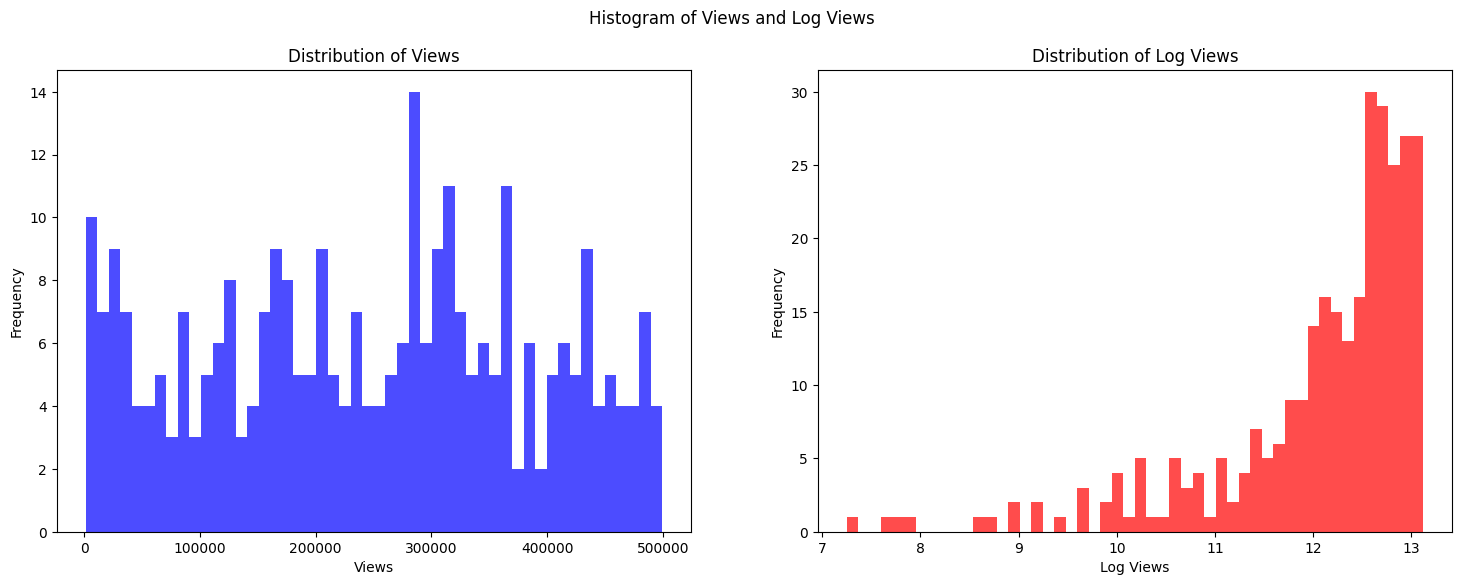

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle('Histogram of Views and Log Views') 
ax1.hist(df['views'], bins=50, color='blue', alpha=0.7)
ax1.set_title('Distribution of Views')
ax1.set_xlabel('Views')
ax1.set_ylabel('Frequency')
ax2.hist(df['log_views'], bins=50, color='red', alpha=0.7)
ax2.set_title('Distribution of Log Views')
ax2.set_xlabel('Log Views')
ax2.set_ylabel('Frequency')
plt.show()

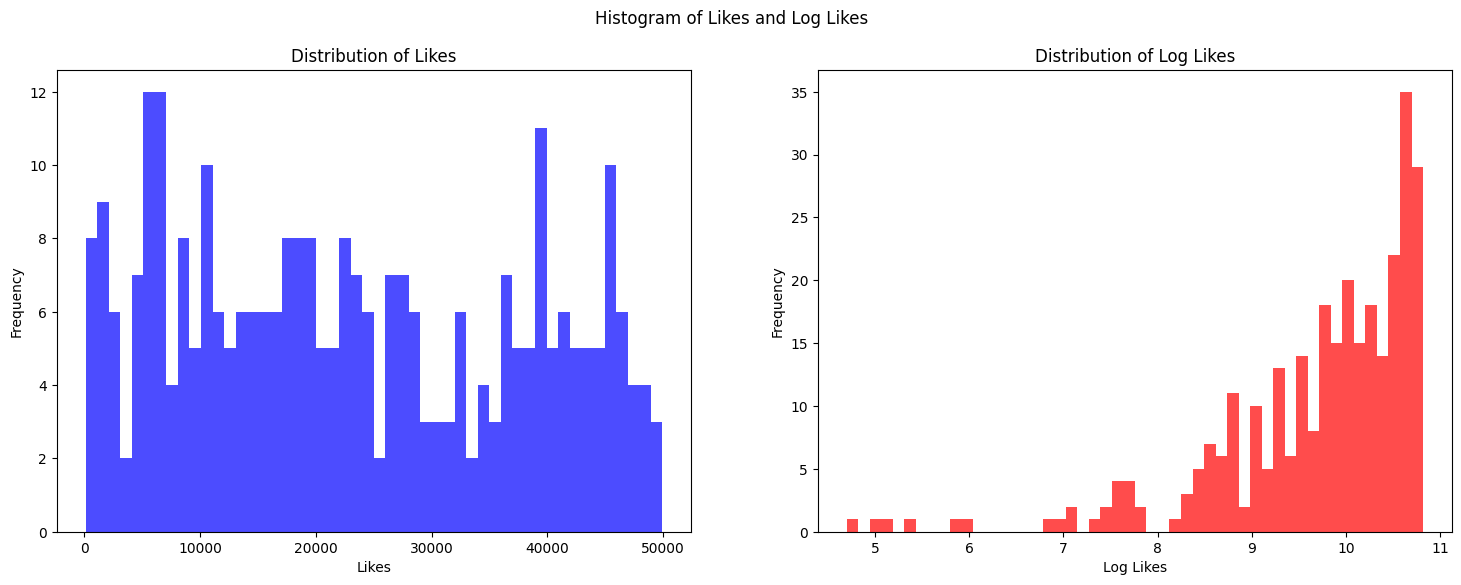

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle('Histogram of Likes and Log Likes') 
ax1.hist(df['likes'], bins=50, color='blue', alpha=0.7)
ax1.set_title('Distribution of Likes')
ax1.set_xlabel('Likes')
ax1.set_ylabel('Frequency')
ax2.hist(df['log_likes'], bins=50, color='red', alpha=0.7)
ax2.set_title('Distribution of Log Likes')
ax2.set_xlabel('Log Likes')
ax2.set_ylabel('Frequency')
plt.show()

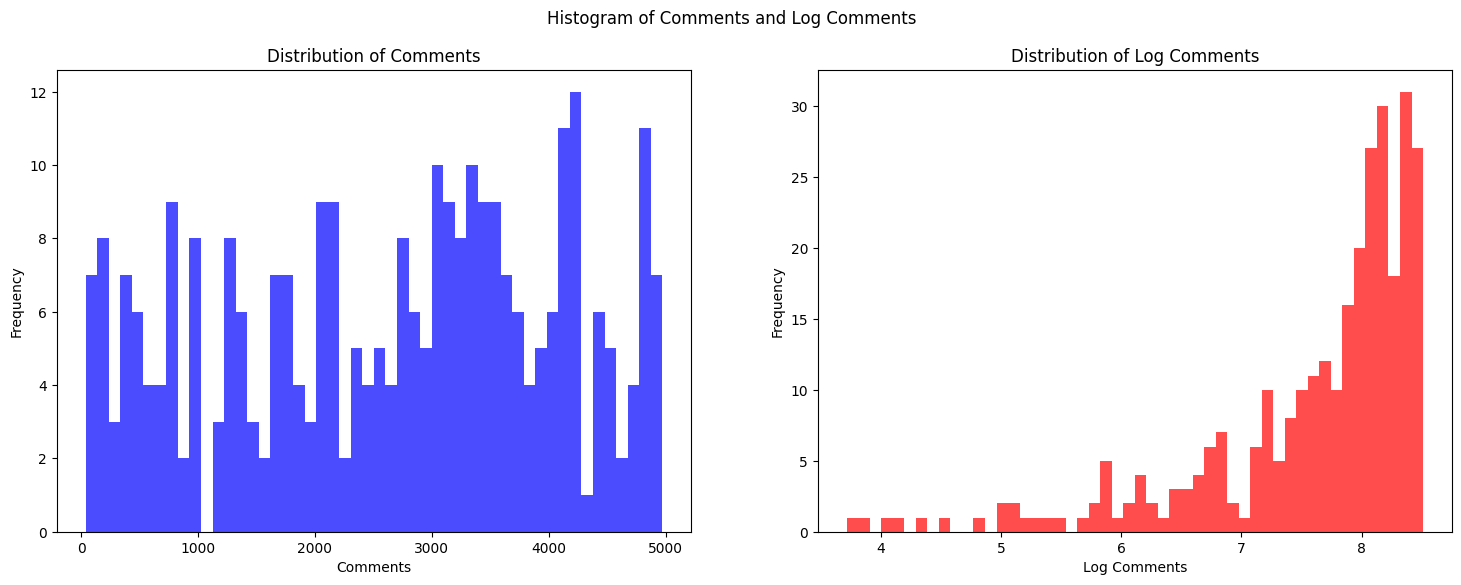

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle('Histogram of Comments and Log Comments') 
ax1.hist(df['comments'], bins=50, color='blue', alpha=0.7)
ax1.set_title('Distribution of Comments')
ax1.set_xlabel('Comments')
ax1.set_ylabel('Frequency')
ax2.hist(df['log_comments'], bins=50, color='red', alpha=0.7)
ax2.set_title('Distribution of Log Comments')
ax2.set_xlabel('Log Comments')
ax2.set_ylabel('Frequency')
plt.show()

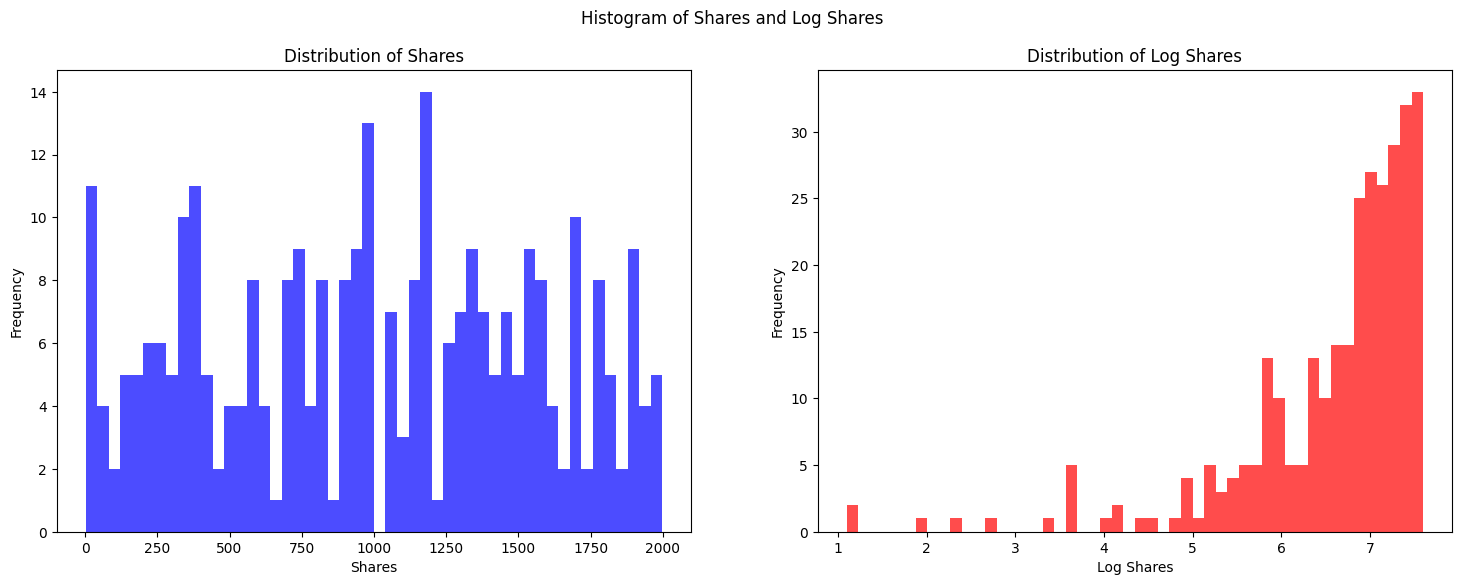

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle('Histogram of Shares and Log Shares') 
ax1.hist(df['shares'], bins=50, color='blue', alpha=0.7)
ax1.set_title('Distribution of Shares')
ax1.set_xlabel('Shares')
ax1.set_ylabel('Frequency')
ax2.hist(df['log_shares'], bins=50, color='red', alpha=0.7)
ax2.set_title('Distribution of Log Shares')
ax2.set_xlabel('Log Shares')
ax2.set_ylabel('Frequency')
plt.show()

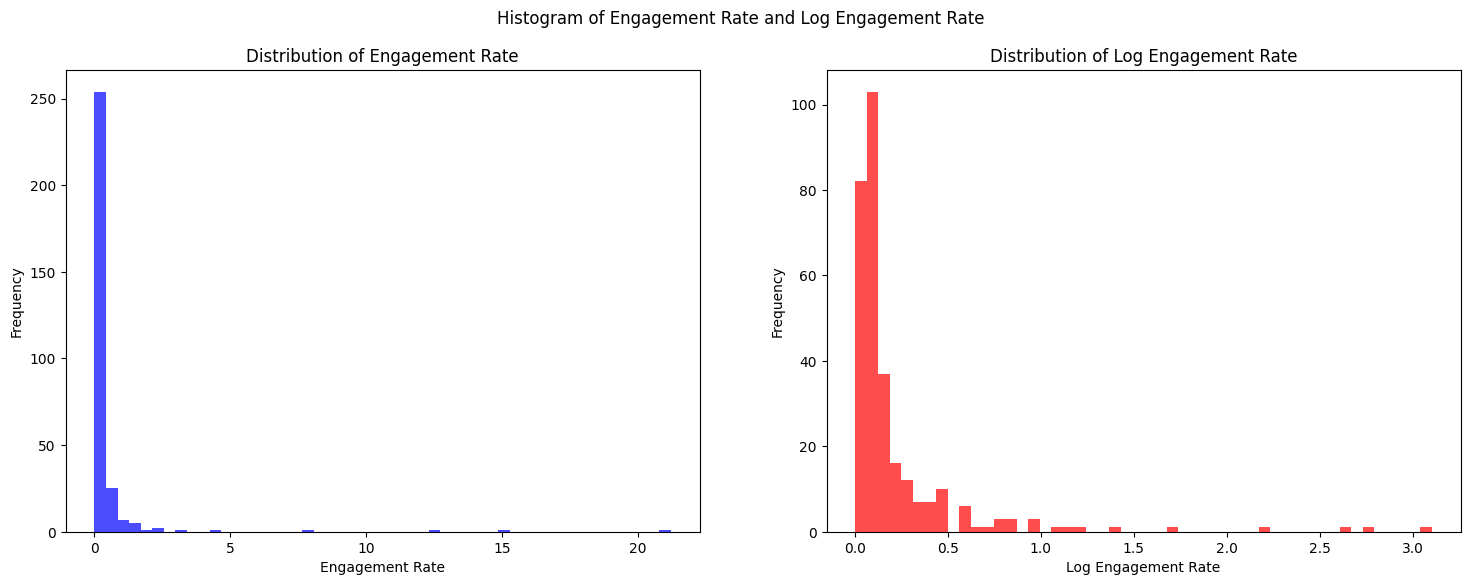

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle('Histogram of Engagement Rate and Log Engagement Rate') 
ax1.hist(df['engagement_rate'], bins=50, color='blue', alpha=0.7)
ax1.set_title('Distribution of Engagement Rate')
ax1.set_xlabel('Engagement Rate')
ax1.set_ylabel('Frequency')
ax2.hist(df['log_engagement_rate'], bins=50, color='red', alpha=0.7)
ax2.set_title('Distribution of Log Engagement Rate')
ax2.set_xlabel('Log Engagement Rate')
ax2.set_ylabel('Frequency')
plt.show()

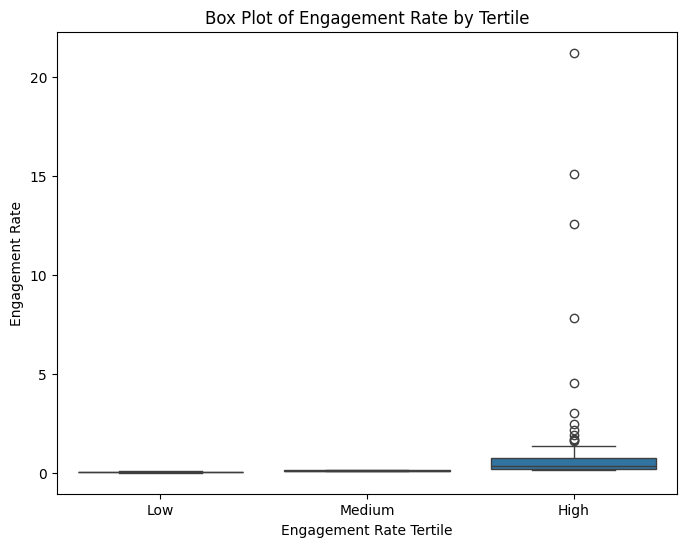

In [36]:
# Let's plot Box plot for Engagement Rate by Tertile
plt.figure(figsize=(8, 6))
sns.boxplot(x='engagement_rate_tertile', y='engagement_rate', data=df)
plt.title('Box Plot of Engagement Rate by Tertile')
plt.xlabel('Engagement Rate Tertile')
plt.ylabel('Engagement Rate')
plt.show()

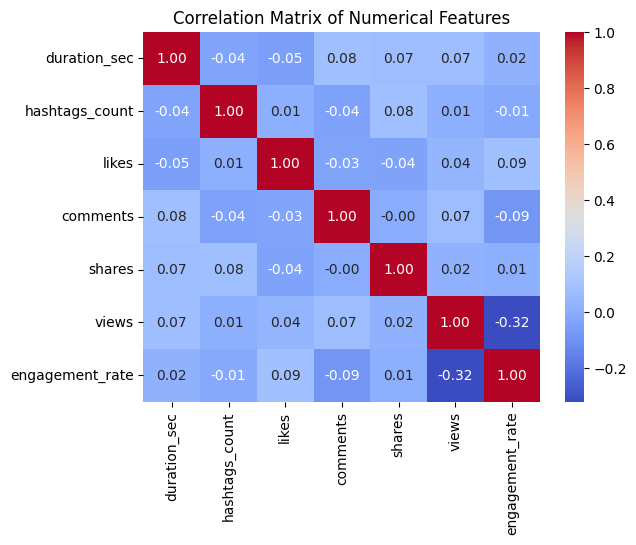

In [37]:
numerical_features = ['duration_sec', 'hashtags_count', 'likes', 'comments', 'shares', 'views', 'engagement_rate']
sns.heatmap(df[numerical_features].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

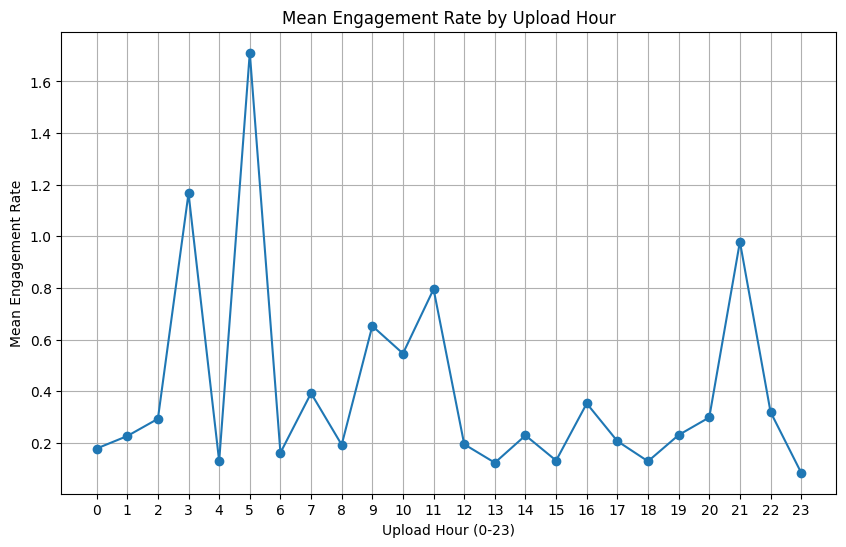

In [38]:
#Group data by upload_hour (0-23) and plot the mean engagement_rate to look for peaks.
engagement_by_hour = df.groupby('upload_hour')['engagement_rate'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(engagement_by_hour['upload_hour'], engagement_by_hour['engagement_rate'], marker='o')
plt.title('Mean Engagement Rate by Upload Hour')
plt.xlabel('Upload Hour (0-23)')
plt.ylabel('Mean Engagement Rate')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

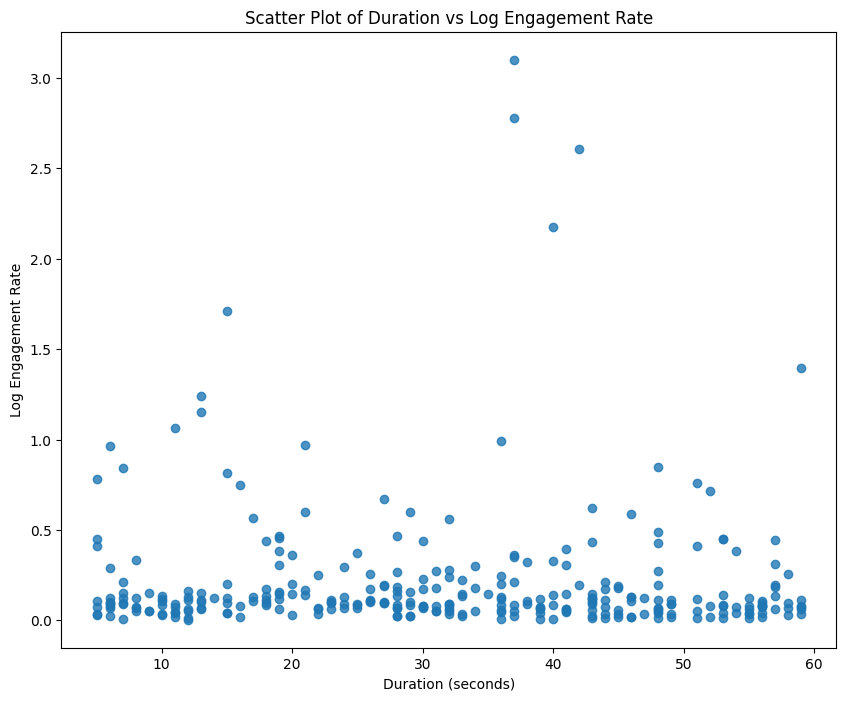

In [46]:
plt.figure(figsize=(10, 8))
plt.scatter(df['duration_sec'], df['log_engagement_rate'], alpha=0.8)
plt.title('Scatter Plot of Duration vs Log Engagement Rate')
plt.xlabel('Duration (seconds)')
plt.ylabel('Log Engagement Rate')
plt.show()

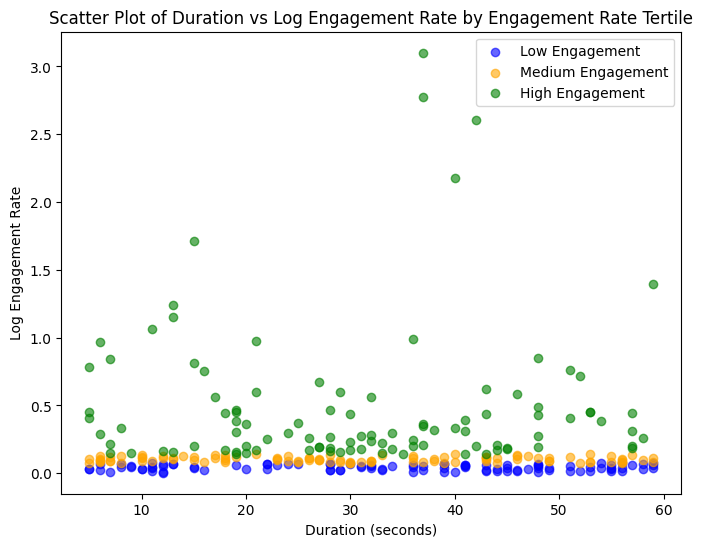

In [53]:
# Let's do a scatter plot of Duration vs Log Engagement Rate , but color-code Low, Medium, High Engagement Rate Tertiles
plt.figure(figsize=(8, 6))
df_duration_engagement = df[['duration_sec', 'log_engagement_rate', 'engagement_rate_tertile']]
df_duration_engagement_low = df_duration_engagement[df_duration_engagement['engagement_rate_tertile'] == 'Low']
df_duration_engagement_medium = df_duration_engagement[df_duration_engagement['engagement_rate_tertile'] == 'Medium']
df_duration_engagement_high = df_duration_engagement[df_duration_engagement['engagement_rate_tertile'] == 'High']
plt.scatter(df_duration_engagement_low['duration_sec'], df_duration_engagement_low['log_engagement_rate'], color='blue', label='Low Engagement', alpha=0.6)
plt.scatter(df_duration_engagement_medium['duration_sec'], df_duration_engagement_medium['log_engagement_rate'], color='orange', label='Medium Engagement', alpha=0.6)
plt.scatter(df_duration_engagement_high['duration_sec'], df_duration_engagement_high['log_engagement_rate'], color='green', label='High Engagement', alpha=0.6)
plt.title('Scatter Plot of Duration vs Log Engagement Rate by Engagement Rate Tertile')
plt.xlabel('Duration (seconds)')
plt.ylabel('Log Engagement Rate')
plt.legend()
plt.show()

In [72]:
# Let's split the dataset into training and testing sets
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, StratifiedKFold, cross_val_score, cross_validate  
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42, stratify=df['engagement_rate_tertile'])
print("Training set size: ", len(train_set))
print("Testing set size: ", len(test_set))

Training set size:  240
Testing set size:  60


In [52]:
train_set_engagement_tertile_counts = train_set['engagement_rate_tertile'].value_counts(normalize=False)
test_set_engagement_tertile_counts = test_set['engagement_rate_tertile'].value_counts(normalize=False)
print("Training Set Engagement Rate Tertile Distribution:")
print(train_set_engagement_tertile_counts)
print("Testing Set Engagement Rate Tertile Distribution:")
print(test_set_engagement_tertile_counts)

Training Set Engagement Rate Tertile Distribution:
engagement_rate_tertile
High      82
Low       79
Medium    79
Name: count, dtype: int64
Testing Set Engagement Rate Tertile Distribution:
engagement_rate_tertile
Low       20
Medium    20
High      20
Name: count, dtype: int64


In [ ]:
numerical_features = ['duration_sec', 'hashtags_count']
engineered_numerical_features = ['likes_per_sec', 'comments_per_sec', 'shares_per_sec', 'views_per_sec', 'log_views', 'log_likes', 'log_comments', 'log_shares', 'log_engagement_rate']
categorical_features = ['upload_hour', 'category'] 
y_variable = 'engagement_rate_tertile'


In [64]:
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.pipeline import Pipeline 
from imblearn.over_sampling import SMOTE 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 

In [69]:
classifier_dict = {
    'LogisticRegression_Classifier': LogisticRegression(random_state=42, max_iter=200),
    'RandomForest_Classifier': RandomForestClassifier(random_state=42),
    'KNN_Classifier': KNeighborsClassifier(),
    'Support_Vector_Classifier': SVC(random_state=42)
}

In [70]:
numeric_transformer = Pipeline(steps=[
    #('imputer', SimpleImputer(strategy='median')), # As there is no missing value, we can skip imputation 
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    #('imputer', SimpleImputer(strategy='most_frequent', fill_value='missing')), # As there is no missing value, we can skip imputation 
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])
end_to_end_pipelines = {}
for classifier_name, classifier in classifier_dict.items():
    end_to_end_pipelines[classifier_name] = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', classifier)
    ])



In [73]:
cvs = {}
scores = {}
scoring = {
    'accuracy': 'accuracy',
    'f1_macro': 'f1_macro'
}
accuracy_scores = {}
f1_macro_scores = {} 
for classifier_name, pipeline in end_to_end_pipelines.items():  
    cvs[classifier_name] = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores[classifier_name] = cross_validate(pipeline, train_set[numerical_features + categorical_features], train_set[y_variable], 
                                              cv=cvs[classifier_name], scoring=scoring, return_train_score=False, n_jobs=-1, 
                                              error_score='raise')
     
    accuracy_scores[classifier_name] = scores[classifier_name]['test_accuracy']
    f1_macro_scores[classifier_name] = scores[classifier_name]['test_f1_macro']

    # Calculate mean ± std
    accuracy_mean = np.mean(accuracy_scores[classifier_name])
    accuracy_std = np.std(accuracy_scores[classifier_name])

    f1_macro_mean = np.mean(f1_macro_scores[classifier_name])
    f1_macro_std = np.std(f1_macro_scores[classifier_name])
    print(f"{classifier_name} - Accuracy: {accuracy_mean:.4f} ± {accuracy_std:.4f}, F1 Macro: {f1_macro_mean:.4f} ± {f1_macro_std:.4f}")
    
    

LogisticRegression_Classifier - Accuracy: 0.3083 ± 0.0425, F1 Macro: 0.3028 ± 0.0444
RandomForest_Classifier - Accuracy: 0.3375 ± 0.0637, F1 Macro: 0.3329 ± 0.0660
KNN_Classifier - Accuracy: 0.3417 ± 0.0312, F1 Macro: 0.3376 ± 0.0359
Support_Vector_Classifier - Accuracy: 0.3333 ± 0.0645, F1 Macro: 0.3286 ± 0.0687


In [99]:


param_grid_logreg = {
    'classifier__C': [np.inf, 0.01, 0.1, 1, 10, 100],
    'classifier__l1_ratio': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    #'classifier__penalty': ['l2', None],
    'classifier__solver': ['lbfgs', 'sag', 'saga', 'newton-cg', 'newton-cholesky'],
    'classifier__class_weight': ['balanced'],
    'classifier__tol': [1e-4, 1e-3, 1e-2, 0.1] 
} 

param_grid_random_forest = {
    'classifier__n_estimators': [25, 50, 75, 100],
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 3, 4, 5, 6, 7, 8, 9, 10],
    'classifier__min_samples_split': [2, 5, 10, 15],
    'classifier__min_samples_leaf': [4, 6, 8, 10],
    'classifier__class_weight': ['balanced', 'balanced_subsample']
}

param_grid_xgboost = {
    #'classifier__n_estimators': [20, 50, 80, 100],
    'classifier__max_depth': [4, 6, 8, 10],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__subsample': [0.6, 0.8, 1.0]
}

param_grid_lightgbm = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [-1, 10, 20],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__num_leaves': [31, 50, 100]
}

param_grid_knn = {
    'classifier__n_neighbors': [5, 10, 15, 20],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 
    'classifier__leaf_size': [5, 10, 15, 20, 30, 40],
    'classifier__metric': ['euclidean', 'manhattan'] 
}   

param_grid_svm = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__kernel': ['linear', 'rbf', 'poly'],
    'classifier__gamma': ['scale', 'auto', 0.1, 1.0],
    'classifier__tol': [1e-4, 1e-3, 1e-2, 0.1],
    'classifier__class_weight': ['balanced'],
    'classifier__break_ties': [True, False]

}





In [100]:
Best_params = {}
Accuracy = {}
F1_Macro = {} 

In [101]:
grid_search_cvs = {}
randomized_search_cvs = {}
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform, randint
tune_smote = False 

for classifier_name, pipeline in end_to_end_pipelines.items():
    if classifier_name == 'LogisticRegression_Classifier':
        param_grid = param_grid_logreg
    elif classifier_name == 'RandomForest_Classifier':
        param_grid = param_grid_random_forest
    elif classifier_name == 'KNN_Classifier':
        param_grid = param_grid_knn
    elif classifier_name == 'Support_Vector_Classifier':
        param_grid = param_grid_svm
    else:
        continue  
    if tune_smote == True:
        param_grid.update({
            'smote__k_neighbors': [3, 5, 7, 9],
            'smote__sampling_strategy': ['auto', 0.5, 0.75, 1.0]
        }) 
    grid_search_cvs[classifier_name] = GridSearchCV(pipeline, param_grid, cv=cvs[classifier_name], 
                                                    scoring=scoring, n_jobs=-1, verbose=1, error_score=np.nan, refit=False)
    try :
        grid_search_cvs[classifier_name].fit(train_set[numerical_features + categorical_features], train_set[y_variable])
        #print(f"Best parameters for {classifier_name}: {grid_search_cvs[classifier_name].best_params_}")
        #print(f"Best F1 Macro Score for {classifier_name}: {grid_search_cvs[classifier_name].best_score_:.4f}")
        Best_params[classifier_name] = grid_search_cvs[classifier_name].best_params_
        Accuracy[classifier_name] = grid_search_cvs[classifier_name].best_score_ 
    except Exception as e:
        print(f"Error during GridSearchCV for {classifier_name}: {e}")

Fitting 5 folds for each of 1320 candidates, totalling 6600 fits


/Users/abhishekdas/Documents/YoutubeShorts/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1170: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/abhishekdas/Documents/YoutubeShorts/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1170: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/abhishekdas/Documents/YoutubeShorts/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1170: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/abhishekdas/Documents/YoutubeShorts/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1170: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/abhishekdas/Documents/YoutubeShorts/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1170: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

Error during GridSearchCV for LogisticRegression_Classifier: 'GridSearchCV' object has no attribute 'best_params_'
Fitting 5 folds for each of 2304 candidates, totalling 11520 fits
Error during GridSearchCV for RandomForest_Classifier: 'GridSearchCV' object has no attribute 'best_params_'
Fitting 5 folds for each of 384 candidates, totalling 1920 fits


/Users/abhishekdas/Documents/YoutubeShorts/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:945: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/abhishekdas/Documents/YoutubeShorts/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 166, in __call__
    score = scorer._score(
        cached_call, estimator, *args, **routed_params.get(name).score
    )
  File "/Users/abhishekdas/Documents/YoutubeShorts/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 409, in _score
    y_pred = method_caller(
        estimator,
    ...<2 lines>...
        pos_label=pos_label,
    )
  File "/Users/abhishekdas/Documents/YoutubeShorts/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 96, in _cached_call
    result, _ = _get_response_values(
                ~~~~~~~~~~~~~~~~~~~~^
        estimator, *args, response_method=response_met

Error during GridSearchCV for KNN_Classifier: 'GridSearchCV' object has no attribute 'best_params_'
Fitting 5 folds for each of 384 candidates, totalling 1920 fits
Error during GridSearchCV for Support_Vector_Classifier: 'GridSearchCV' object has no attribute 'best_params_'


In [98]:
print(Accuracy)

{}
